# **AISaturdays Rental Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial para la predicción de precios de rentals de los barrios de una ciudad. En este ejercicio estimaremos el precio de una oferta de alquiler, dependiendo de unos datos descritos más abajo.

**Instrucciones:**

- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Aplicar el algoritmo de Random Forest
- Mejorar la predicción usando Hyperparameter Tunning, Feature engineering y Gradient Boosting

¡Empecemos!


#1.Importación de librerias 

In [330]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

#2. Dataset

0. Lee el .csv con los datos y muestra las primeras filas.

In [331]:
#Dos lineas de código
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35706,28341280,Bushwick Rustic Loft,10812370,Al,Brooklyn,Bushwick,40.69987,-73.91821,Private room,1,28,2019-07-07,2.75,1,36,69
1,2434,1213991,Private 2 bedroom Midtown Manhattan,6626827,Steve,Manhattan,Hell's Kitchen,40.76247,-73.99294,Private room,4,77,2019-06-19,1.81,1,21,240
2,44725,34372753,Spacious Manhattan Apartment,40038018,Yves,Manhattan,Midtown,40.76152,-73.97176,Entire home/apt,5,2,2019-06-09,1.00,1,132,449
3,32341,25311295,"★Modern,Cozy 3BDR/2BA Getaway in Upper East!",17896706,Mark,Manhattan,Upper East Side,40.77988,-73.95482,Entire home/apt,4,58,2019-06-18,4.26,1,158,399
4,9648,7411421,Hip & Trendy Williamsburg 2 BR 2BA Apartment,3750905,Louis,Brooklyn,Williamsburg,40.71303,-73.95580,Entire home/apt,2,28,2019-06-22,0.61,1,170,109


1. Muestra el numero de features y ejemplos en el dataset.

In [332]:
# Sólo con una línea de código
df.shape

(32759, 17)

2. Obtén que tipos de datos (dtypes) contiene el dataset.

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32759 entries, 0 to 32758
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32759 non-null  int64  
 1   id                              32759 non-null  int64  
 2   name                            32755 non-null  object 
 3   host_id                         32759 non-null  int64  
 4   host_name                       32742 non-null  object 
 5   neighbourhood_group             32759 non-null  object 
 6   neighbourhood                   32759 non-null  object 
 7   latitude                        32759 non-null  float64
 8   longitude                       32759 non-null  float64
 9   room_type                       32759 non-null  object 
 10  minimum_nights                  32759 non-null  int64  
 11  number_of_reviews               32759 non-null  int64  
 12  last_review                     

### Variables



* **Id/name:**  Identificador y nombre de la oferta.

* **host_id/host_name:** Identificador y nombre del anfitrión.

* **neighbourhood_group/neighbourhood:** Zona y barrio de la oferta. Cada zona es una agrupación de barrios.
* **latitude/longitude:** Latitud y longitud de la oferta.

* **room_type:** Que tipo de habitación se oferta. Puede ser el apartamento o casa entero, una habitación privada o una compartida.

* **minimum_nights:**  Noches de estancia mínima.

* **number_of_reviews:**  Número total de reviews de la oferta.

* **last_review:**  Fecha de la última review hecha.

* **reviews_per_month:** Número de reviews por mes. No siempre es entero y la mayoría son menos de 1.

* **calculated_host_listings_count:** Cuantas habitaciones tiene el host en oferta.

* **availability_365:** La disponibilidad de la oferta en un año: máximo de 365 (todo el año en oferta)

* **price:** ¡Nuestro objetivo!. El precio de la oferta, en dolares.



¿Es este un problema de regression o de classification? ¿Por que?:

Es un problema de regresión debido a que se trata de predecir una variable continua

3. Antes de analizar el dataset, tenemos que transformar las fechas (la feature last_review) en algo con lo que podamos trabajar. Pandas tiene un data type específicamente para esto, datetime. Transforma last_review a formato datetime.

In [334]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [335]:
df.dtypes

Unnamed: 0                                 int64
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price                                      int64
dtype: object

4. Para analizar los datos también necesitamos saber cuanta información nos falta. Utiliza isnull() para averiguar a que feature le faltan mas datos. 

In [336]:
# Sólo con una línea de código
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 4
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       6772
reviews_per_month                 6772
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

5. Finalmente, solo nos falta deshacernos de las features que solo sirven de identificador y no ayudan a predecir.

In [337]:
# Sólo con una línea de código
df_refine=df.drop(columns=['id','name','host_id','host_name','Unnamed: 0'])

6. ¡Todo listo! Ya podemos analizar la distribución de los datos con la función .describe()

In [338]:
# Sólo con una línea de código
df_refine.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,32759.000000,32759.000000,32759.000000,32759.000000,25987.000000,32759.000000,32759.000000,32759.000000
mean,40.728968,-73.952465,7.131475,23.240911,1.383150,7.223175,113.116090,154.312983
std,0.054479,0.045704,21.236959,44.354050,1.699714,33.275291,131.687842,256.571284
min,40.499790,-74.240840,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.690150,-73.983130,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,40.723180,-73.955800,3.000000,5.000000,0.730000,1.000000,45.000000,107.000000
75%,40.763155,-73.936540,5.000000,24.000000,2.030000,2.000000,226.000000,178.000000
max,40.913060,-73.712990,1250.000000,607.000000,58.500000,327.000000,365.000000,10000.000000


### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

Este dataset contiene información incompleta que debemos rellenar para poder usarla a la hora de predecir el precio de las ofertas.
También tenemos que transformar last_review si queremos incluirla en la predicción (no podemos utilizar una fecha como input directamente).

Para esta limpieza usaremos varias funciones de Pandas. Aquí teneis una [pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf).

7. Encuentra el número de ofertas que por no tener reviews no tienen información en las columnas de last_review y reviews_per_month.

In [339]:
# Sólo con una línea de código
sum(df_refine['last_review'].isnull())

6772

8. Tenemos que completar esta información si no queremos eliminar el resto del ejemplo. Rellena todos los NaNs de las reviews_per_month con 0 (Completaremos la columna de last_review después).

In [340]:
# Sólo con una línea de código 
df_refine['reviews_per_month']= df_refine['reviews_per_month'].fillna(0)

9. Vamos a transformar la variable last_review. Es una fecha, lo cual nos hace dificil trabajar con ella. Vamos primero a completar los ejemplos que no tienen una última fecha. Reemplaza estos NaNs con la primera review histórica del dataset.

In [341]:
# Dos lineas de código 
df_refine['last_review']=df_refine['last_review'].fillna(min(df_refine['last_review']))

10. Ahora que no tenemos valores vacios podemos cambiar la variable last_review a algo mas util. Buscamos que valores mas pequeños correspondan a reviews antiguas o que no hayan tenido ninguna, mientras que valores mas grandes correspondan a reviews mas recientes. 

Podemos utilizar la función toordinal() para hayar el número de dias que han transcurrido desde el dia 1 del año 1, pero esos siguen siendo números demasiado grandes que no siguen la distribución que buscamos.

Consigue que last_reviews pase a representar la cantidad de dias que han transcurrido desde que se hizo la primera review histórica. 

In [342]:
# Solo una línea de código
df_refine['days_last_review']=df_refine['last_review']-min(df_refine['last_review'])
df_refine['days_last_review']=df_refine['days_last_review'].dt.days

11. Para visualizar la distribución de las fechas, genera una gráfica que muestre la variable last_reviews.

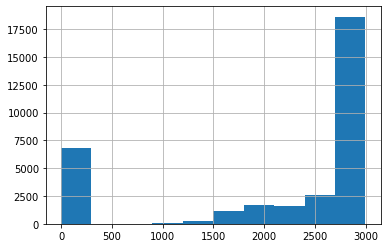

In [343]:
# Solo una línea de código
df_refine['days_last_review'].hist()

Parece que hay dos grupos muy distinguidos. ¿A que se debe esta distribución?:

#### Estudio de la variable a predecir y eliminación de ruido

12. A la hora de predecir el precio, es mucho mas favorable si primero transformamos y analizamos la variable que buscamos para hacerla mas facil de predecir.

Primero, vamos a ver como el precio de las ofertas está distribuido. Genera una gráfica que muestre el precio de las ofertas. Aquí tienes una [Pista](https://seaborn.pydata.org/generated/seaborn.distplot.html).

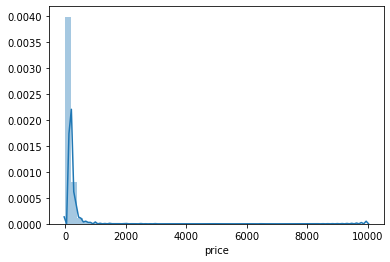

In [344]:
# Solo una línea de código.
sns.distplot(df_refine.price)

Tenemos una variable que sigue una distribución log-normal. Podemos transformarla en una distribución normal aplicando log1p(), una función que responde a la siguiente ecuación:

$ y = log(x+1) $

Esto hace que el precio sea mas facil de predecir, al tener una distribución normal.

13. Vamos a visualizar esta transformación. Genera otra gráfica de price tras aplicar la función log1p().

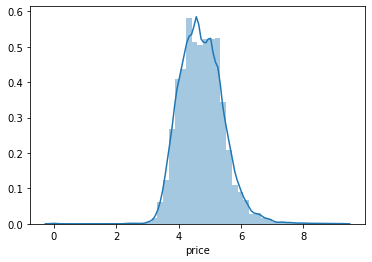

In [345]:
#Solo una línea de código
sns.distplot(np.log1p(df_refine.price))

Ahora tenemos una distribución mucho mas apropiada para hacer predicciones. Sin embargo, todavía quedan muchos outliers que añaden ruido a la muestra.

14. ¿Por encima y debajo de qué valores esta presente este ruido?. Elimina del dataframe aquellos valores que no entren en la distribución normal.

In [346]:
#Dos lineas de código
df_refine.price = np.log1p(df_refine.price)

In [347]:
df_refine = df_refine[(df_refine.price < 8) & (df_refine.price > 3)].reset_index(drop=True)

14. Ahora, vuelve a generar la gráfica de precio y log1p del precio (usa el mismo código que antes, o ponlo en un [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)).

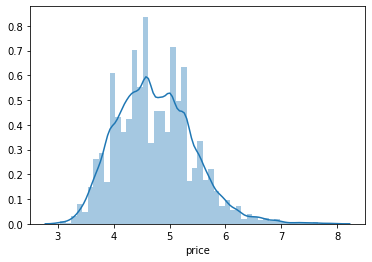

In [348]:
#Cuatro lineas de código
sns.distplot(df_refine.price)

15. Finalmente, tenemos una variable de salida normalizada y sin ruido que mejorará nuestras predicciones. Cambia la variable price por el log1p de price.


Se ha hecho en el punto 14

#### Exploración de variables


Vamos a explorar un poco mas el resto de variables que pueden afectar al precio de una oferta. 

16. Empecemos por crear un histograma de las distintas zonas de la ciudad y la cantidad de ofertas en cada una de ellas (a lo mejor necesitas ampliar el gráfico)

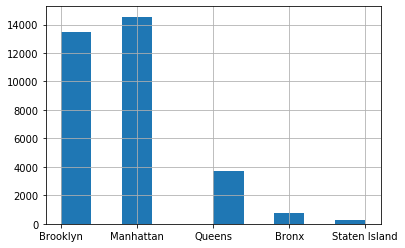

In [349]:
#Tres lineas de código
df_refine['neighbourhood_group'].hist()

17. Ahora crea un mapa de los apartamentos ofertados con la latitud y longitud (puntos extra si los coloreas por zonas o barrios). Lo mejor es hacerlo en un subplot y así puedes controlar el tamaño del mapa.

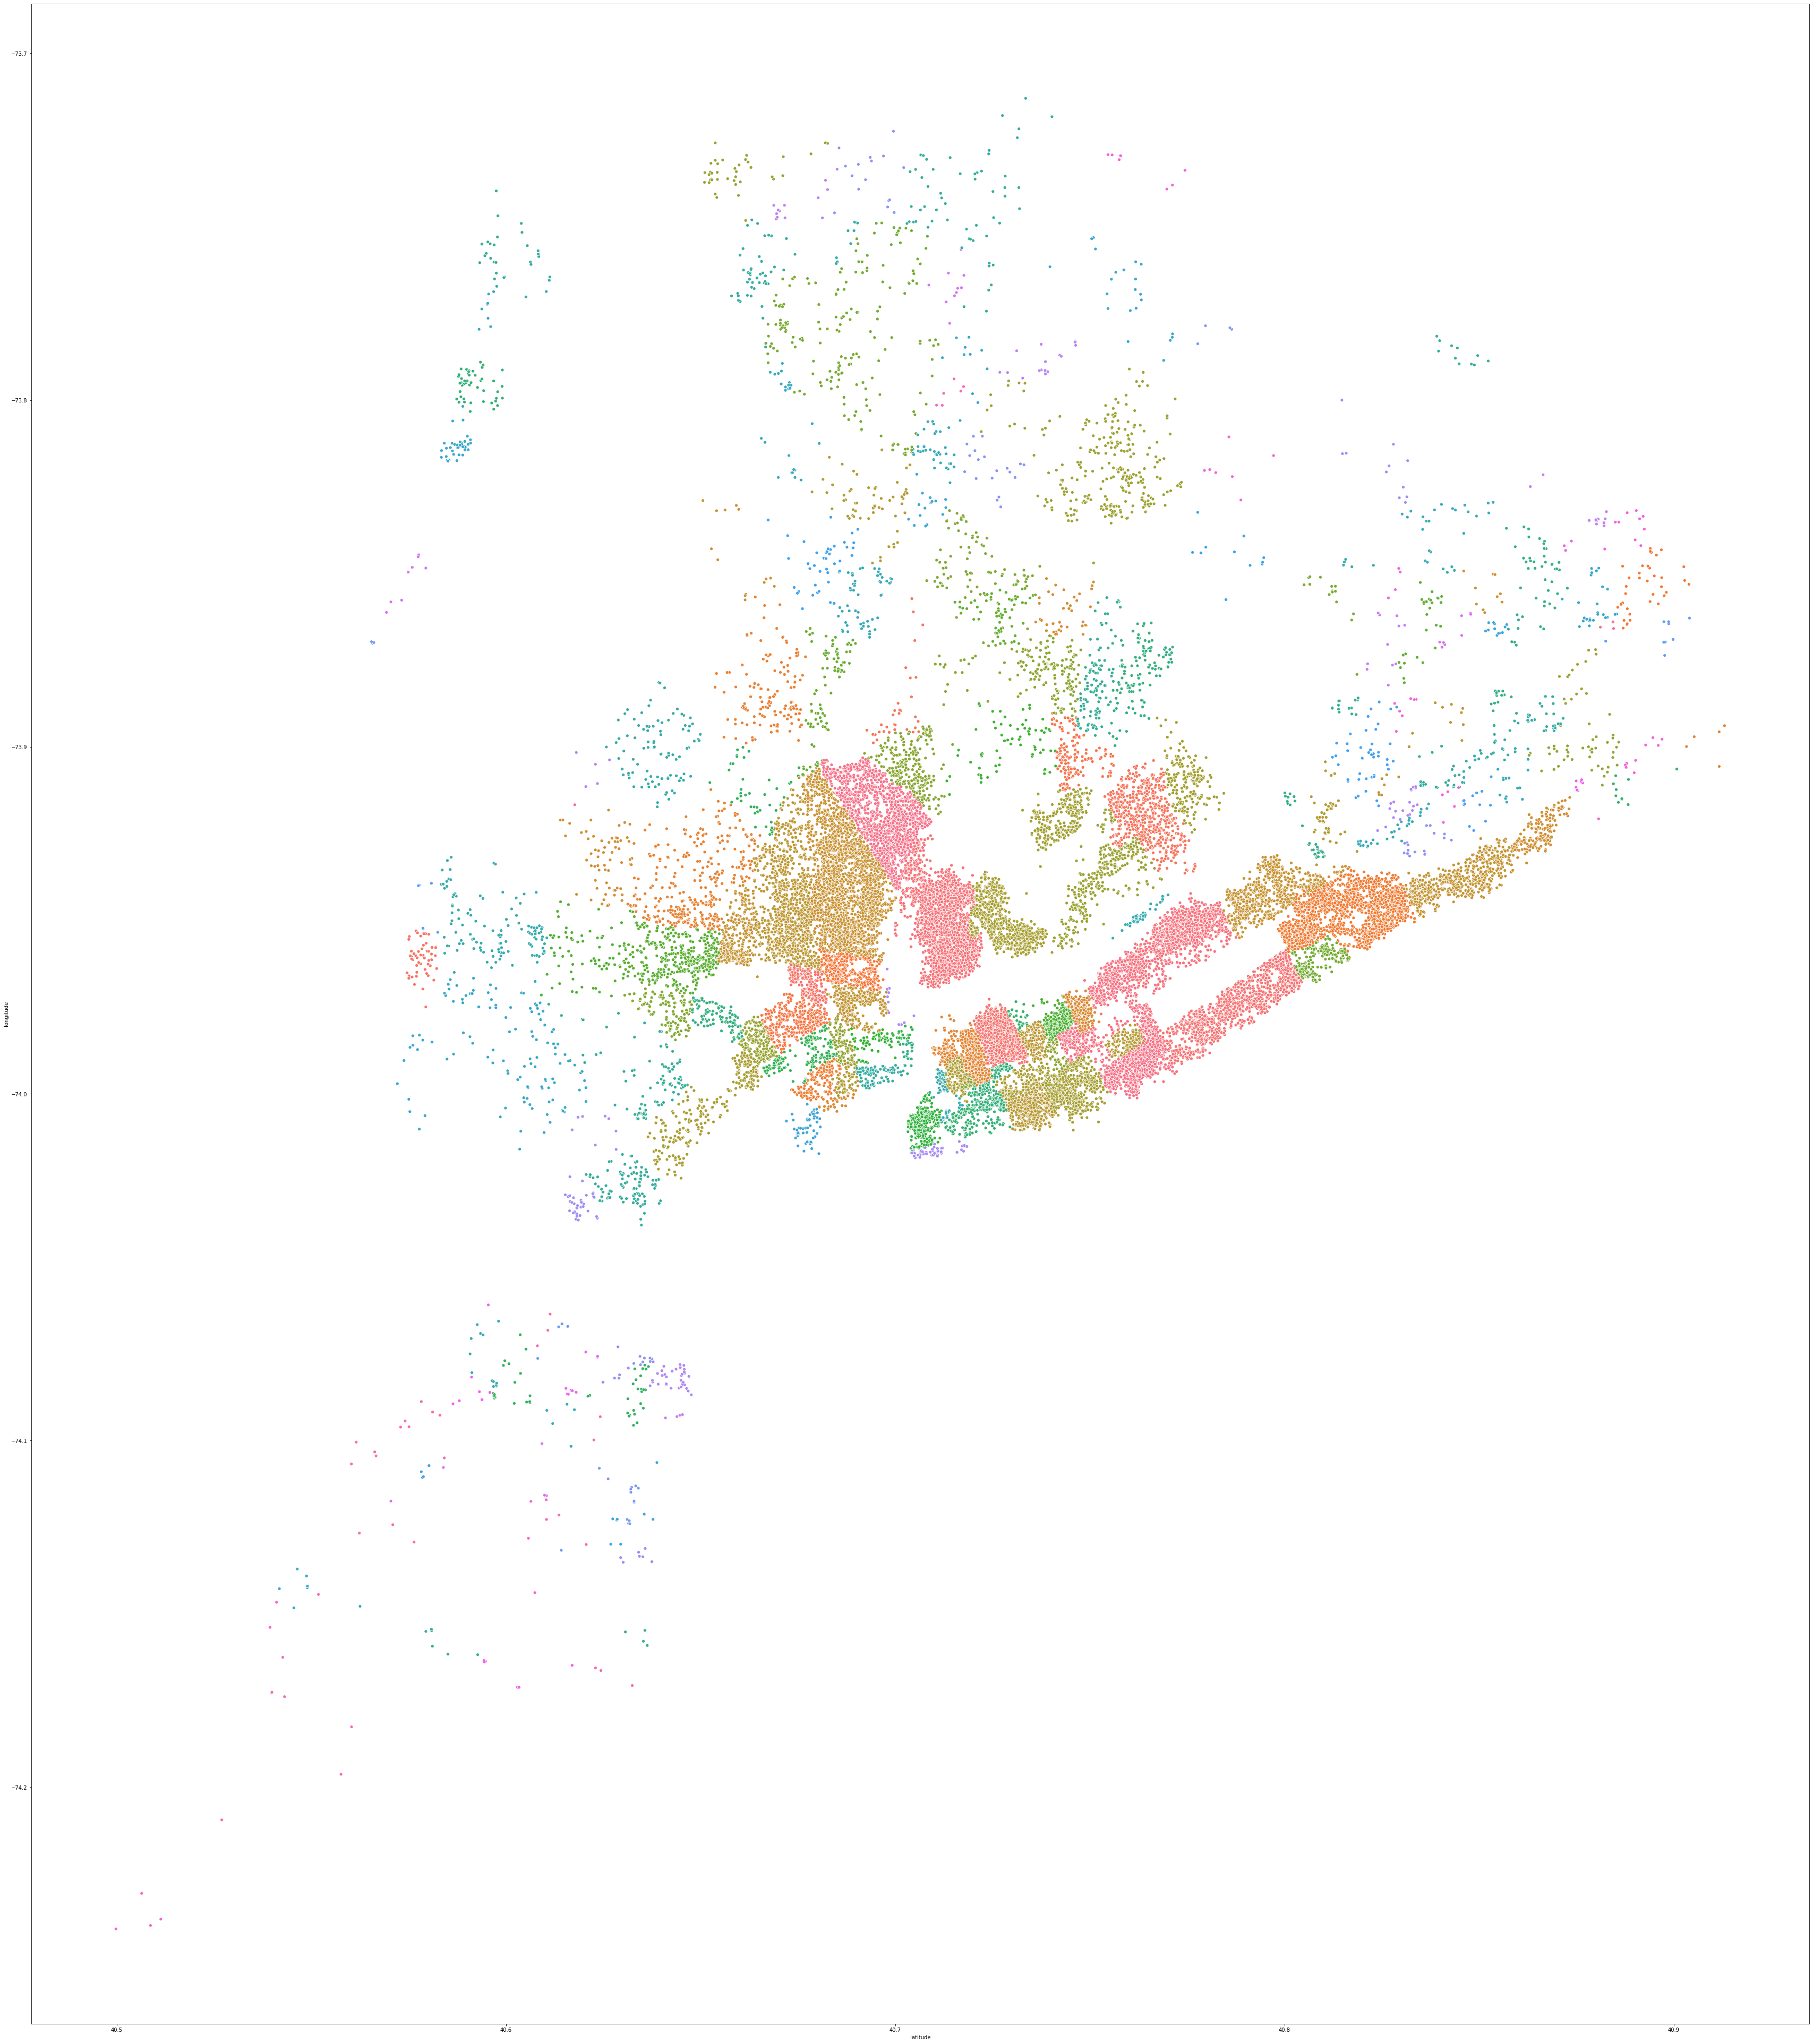

In [350]:
#Dos lineas de código
# Mirada la solucion por curiosidad

fig, axes = plt.subplots(1, figsize=(60,70))
sns.scatterplot(x= df_refine['latitude'], y=df_refine['longitude'],hue= df_refine['neighbourhood'].astype('category'),legend = False, ax = axes)

18. Vamos ahora a generar otro histograma, esta vez con el tipo de habitación ofertado (También es buena idea ajustar el tamaño de la gráfica).

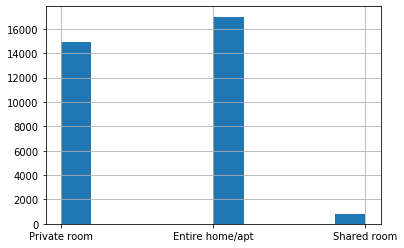

In [351]:
#Tres lineas de código
df_refine['room_type'].hist()

#### Transformación de variables

Podemos aplicar el mismo proceso que le aplicamos a la variable price a nuestras variables de entrada y así conseguir una distribución mas cómoda para los métodos de busqueda.

19. Aplica la transformación log1p() a minimum_nights, generando las gráficas antes y despues y compáralas. 

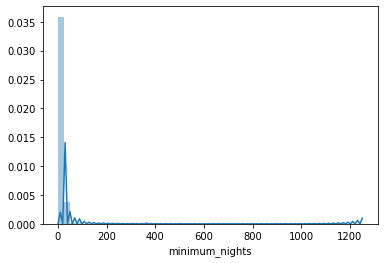

In [352]:
#Tres lineas de código
sns.distplot(df_refine['minimum_nights'])

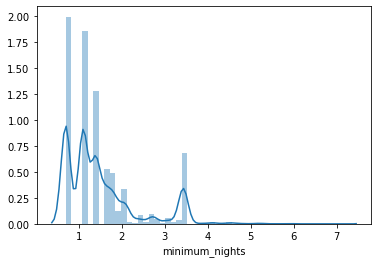

In [353]:
sns.distplot(np.log1p(df_refine['minimum_nights']))

20. Finalmente, guarda minimum_nights como log1p de minimum_nights

In [354]:
#Solo una línea de código.
df_refine['minimum_nights'] = np.log1p(df_refine['minimum_nights'])

21. Repite el proceso, esta vez con reviews_per_month. ¿Es relevante la transformación?

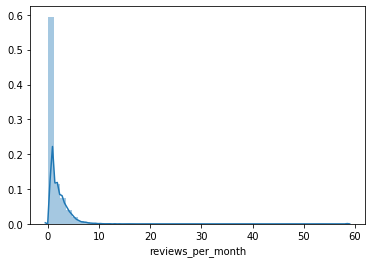

In [355]:
#Tres lineas de código.
sns.distplot(df_refine['reviews_per_month'])

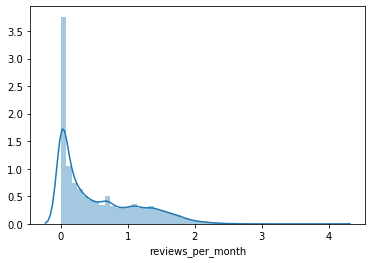

In [356]:
sns.distplot(np.log1p(df_refine['reviews_per_month']))

Consideramos que no es necesario crear el logaritmo para esta variable

#### Estudio de la disponibilidad en número de dias (0,365)

22. Vamos a empezar representando la disponibilidad en un distplot(). Como conocemos los limites de esta variable, lo mejor es limitar el intervalo de la gráfica y hacerla mas grande.


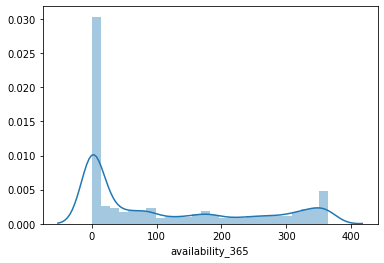

In [357]:
#Cuatro lineas de código.
sns.distplot(df_refine['availability_365'])

#### Añadir variables artificiales

Se ha visto en el scatterplot anterior que parece haber dos grupos, uno disponible la mayor parte del año y otro solo unos pocos dias.

También se intuye que aquellos sitios que no tengan reviews... Como que no dan mucha confi no? ;)

23. Añade tres categorias que midan si el apartamento está disponible todo el año, si su disponibilidad es muy baja (menor de 12 dias al año), y si no tiene reviews.

In [358]:
#Tres lineas de código
df_refine['free_365'] = df_refine['availability_365']>364
df_refine['free_12'] = df_refine['availability_365']<12
df_refine['zero_reviews'] = df_refine['reviews_per_month']==0

24. Vamos a generar un heatmap que muestre la relación entre todas las variables de entrada y price. Utiliza corr() y la función heatmap() de seaborn.

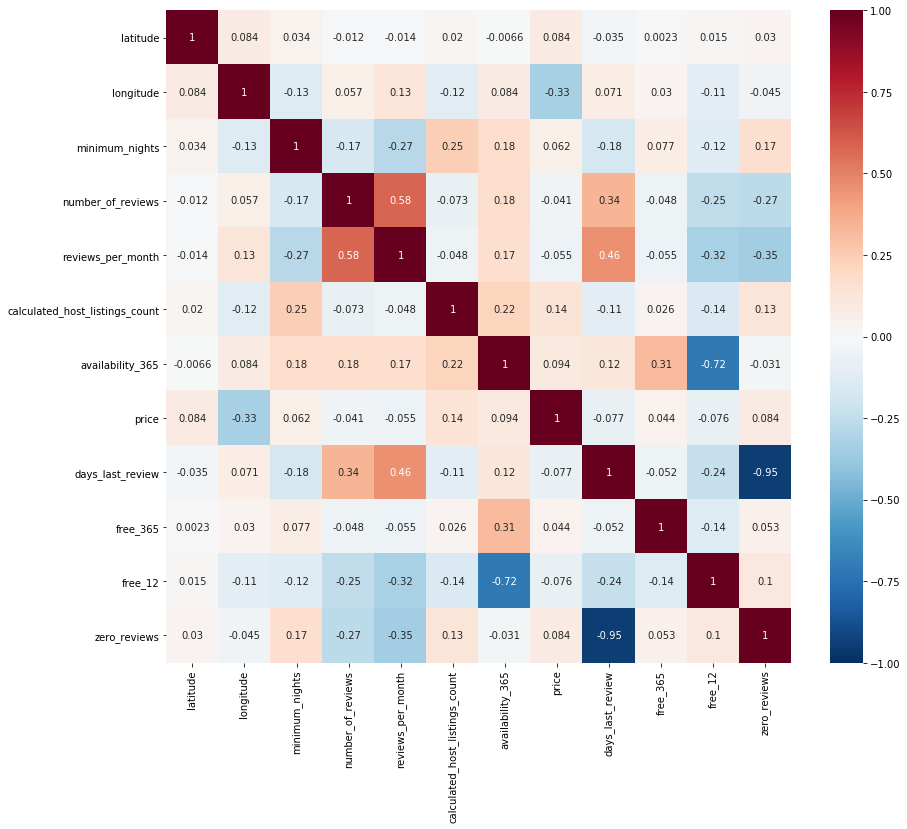

In [359]:
#Tres lineas de código
#mirada la solucion
plt.figure(figsize=(14, 12))
crr = df_refine.corr()
heatmap = sns.heatmap(crr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

#### Pasar variables categóricas a one_hot


25. Para hacer las features categóricas mas fáciles de interpretar por el modelo, vamos a transformarlas en un OneHotEncoding. Utiliza la función get_dummies() de pandas (te deberían de quedar 241 columnas)

In [360]:
#Dos lineas de código
df_refine['zone']=df_refine['neighbourhood_group']+df_refine['neighbourhood']
df_refine=pd.get_dummies(df_refine,columns=['zone','room_type'])

In [361]:
df_refine.head()

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,zone_Staten IslandSt. George,zone_Staten IslandStapleton,zone_Staten IslandTodt Hill,zone_Staten IslandTompkinsville,zone_Staten IslandTottenville,zone_Staten IslandWest Brighton,zone_Staten IslandWesterleigh,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Brooklyn,Bushwick,40.69987,-73.91821,0.693147,28,2019-07-07,2.75,1,36,...,0,0,0,0,0,0,0,0,1,0
1,Manhattan,Hell's Kitchen,40.76247,-73.99294,1.609438,77,2019-06-19,1.81,1,21,...,0,0,0,0,0,0,0,0,1,0
2,Manhattan,Midtown,40.76152,-73.97176,1.791759,2,2019-06-09,1.00,1,132,...,0,0,0,0,0,0,0,1,0,0
3,Manhattan,Upper East Side,40.77988,-73.95482,1.609438,58,2019-06-18,4.26,1,158,...,0,0,0,0,0,0,0,1,0,0
4,Brooklyn,Williamsburg,40.71303,-73.95580,1.098612,28,2019-06-22,0.61,1,170,...,0,0,0,0,0,0,0,1,0,0


#### Eliminacion de variables que son irrelevantes para el modelo

In [363]:
df_refine.drop(columns=['neighbourhood_group','neighbourhood','last_review'],inplace=True)

In [364]:
df_refine.shape

(32681, 232)

# Modelos, modelos, modelos

Hecha toda la exploración, análisis y limpieza de datos, pasamos a la parte divertida: ¡Los modelos!
    
Empezamos importando todas las clases que vamos a necesitar para encontrar un buen modelo predictivo:

In [218]:
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

26. Divide el dataset en X_train, X_test, y_train y y_test utilizando train_test_split(). No te olvides de no incluir price en el training set.

In [222]:
X = df_refine.drop('price', axis=1)
y = df_refine.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26144, 231) (6537, 231) (26144,) (6537,)


27. Vamos a utilizar cross_validation para entrenar nuesto modelo, utilizando Kfold para hayar la score. Implementa un Kfold que realize 5 splits y calcula el error medio y la desviación de un RandomForestRegressor sin cambiar sus parámetros (todavía). [Pista](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [220]:
kf = KFold(n_splits=5, shuffle=True, random_state = 0)
kf.get_n_splits(df_refine)
print(kf)
result = cross_val_score(RandomForestRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=kf,n_jobs=-1)
print('Modelo {}: Error medio y desviación {:.5f} +/- {:5f}'.format(RandomForestRegressor.__name__, -result.mean(), result.std()))

KFold(n_splits=5, random_state=0, shuffle=True)
Modelo RandomForestRegressor: Error medio y desviación 0.18016 +/- 0.004048


28. Al utilizar un RandomForestRegressor, ¿que hiperparámetros estabamos utilizando?. Lista todos los parámetros que utiliza este modelo (utiliza la función get_params() y la librería pprint)

In [223]:
from pprint import pprint
rf = RandomForestRegressor(random_state=0)
print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


Podemos ajustar todos estos paámetros para mejorar la exactitud de nuestro modelo. Una forma de encontrar qué combinación funciona mejor es utilizar un GridSearchCV, que prueba modelos con muchas combinaciones distintas y calcula su score para encontrar el mejor modelo a fuerza bruta. Para esto, hay que pasar una lista de valores para cada parámetro, y GridSearchCV probará con todos. [Mas información](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

29. Delimita que valores quieres que cada parámetro tenga, y incluye cada una de estas listas en un diccionario para poder ejecutar el GridSearchCV. Ten en cuenta los valores posibles para cada uno de los parámetros.

In [224]:
# 8 lineas de código
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] 
max_depth.append(None) 
min_samples_split = [2,5,10] 
min_samples_leaf = [1, 2, 4] 
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

30. Ahora ya podemos implementar un GridSearchCV. Para hacerlo mas rápido, se utiliza una versión que no prueba con todas las combinaciones posibles, sino con unas cuantas de forma aleatorias.(de ahí su nombre, RandomizedSearchCV). Implementalo, teniendo en cuenta que tiene como parametros el modelo a ajustar y el diccionario que hemos definido antes, entre otros. Este paso puede durar unos minutos, ya que tiene que ajustar muchos modelos para encontrar el mejor. Aquí está la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) del RandomizedSearchCV.

In [226]:
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = kf, n_jobs = -1, verbose = 2,  random_state = 0)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.1min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0...
                   iid='deprecat

In [227]:
grid_search.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [228]:
best_grid = grid_search.best_estimator_

In [229]:
best_grid.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [235]:
#Seis lineas de código
y_pred_train = best_grid.predict(X_train)
y_pred_test = best_grid.predict(X_test)

31. Para terminar, encuentra el mean squared error y $R^2$ del mejor modelo que hallas creado. 

In [240]:
#Seis lineas de código
from sklearn.metrics import mean_squared_error, r2_score
print("MSE Train", mean_squared_error(y_train, y_pred_train))
print("MSE Test", mean_squared_error(y_test, y_pred_test))
print("R2 Train", r2_score(y_train, y_pred_train))
print("R2 Test", r2_score(y_test, y_pred_test))

MSE Train 0.045032461761630616
MSE Test 0.18704493386241688
R2 Train 0.9019338447643056
R2 Test 0.5999286133367252


In [256]:
rf2 = RandomForestRegressor(random_state=0, bootstrap=True, 
                      max_depth=100, min_samples_leaf=2,
                      min_samples_split=2, 
                      n_estimators=30, n_jobs=-1, oob_score=True, warm_start=True)
rf2.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=True,
                      random_state=0, verbose=0, warm_start=True)

In [257]:
y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)

In [258]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE Train", mean_squared_error(y_train, y_pred_train))
print("MSE Test", mean_squared_error(y_test, y_pred_test))
print("R2 Train", r2_score(y_train, y_pred_train))
print("R2 Test", r2_score(y_test, y_pred_test))

MSE Train 0.0457023449711677
MSE Test 0.1888213929753385
R2 Train 0.9004750555210264
R2 Test 0.5961289356551049


Ahora, ¡a mejorar esa score!
Puedes probar a:
- Eliminar features que no sean relevantes para la predicción
- Implementar Gradient boosting utilizando XBoost o Adaboost, entre otros
- Ajustar los hiperparámetros manualmente para llegar a mejores modelos
- Utilizar un Tree Interpreter para ver qué árboles de decisión tienen mas importancia

Al acabar el challenge, os daremos un validation set para ver que grupo ha conseguido la mejor score. ¡Quien gane tiene premio!

## Probamos con XGBoost

In [366]:
!pip install xgboost

In [368]:
# debido a que el modelo no admite booleans, convertimos todas las variables boolean a numericas (0,1)

In [399]:
df_num = df_refine.copy()
df_num = df_num*1
# df_num.head()

In [386]:
X = df_num.drop('price', axis=1)
y = df_num.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26144, 231) (6537, 231) (26144,) (6537,)


In [400]:
import xgboost as xgb
# con valores por defecto del modelo
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test
print(mean_squared_error(actuals, predictions))

0.1802145164153491


#### usando GridSearchCV

In [394]:
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  6.7min finished


0.6090493288301433
{'max_depth': 6, 'n_estimators': 50}


In [395]:
best_grid = clf.best_estimator_
print(best_grid)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


In [396]:
best_grid.fit(X_train, y_train)
predictions = clf.predict(X_test)
actuals = y_test
print(mean_squared_error(actuals, predictions))

0.18095128326058219


##### No mejora practicamente nada respecto al modelo anterior